Image format: JPEG
Image mode: RGB
Image size: (400, 400)


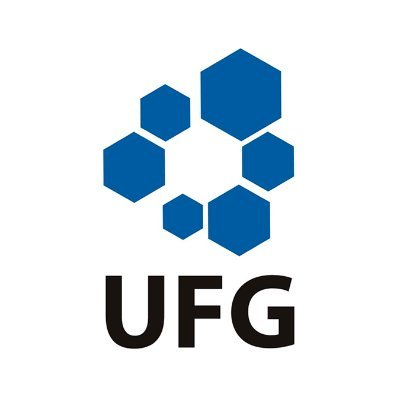

In [349]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("ufg_logo.jpg")

print(f"Image format: {image.format}")
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")

display(image)

In [350]:
width = 50
length = 50

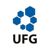

In [351]:
image = image.resize((width, length))
display(image)

In [352]:
import numpy as np
# Convert the image to a NumPy array
pixel_array = np.array(image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

Shape of pixel_array: (50, 50, 3)


In [353]:
pixel_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Shape of pixel_array: (50, 50)


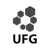

In [354]:
# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the grayscale image to a NumPy array
pixel_array = np.array(gray_image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

# Display the resized image in the notebook
display(gray_image)

In [355]:
width, length = pixel_array.shape
width, length

(50, 50)

In [356]:
def generate_random_individual(width, length):
    size = width * length
    binary_numbers = np.random.randint(0, 2, size=(size, 8), dtype=np.uint8) #binary number str
    binary_representation = ''.join(binary_numbers.ravel().astype(str))
    return binary_representation

In [357]:
individual = generate_random_individual(width, length)
individual

'110010110011000100101010011101101001100011010011100001001010100010110100111000100111001010100111011010111000110011001100100110101100011101100111111001110101110100010101001001001001101100101001101110011010110001100100011100000010010111100010100101111010011110011101000011000111000100011010110110110010010011110100000001100101011100111001100110011011000101100010110011011000010100111011100110001110110011001010011101000011001000101001001101011010000000000100011011011011000010110100100110100001011010101111011011000111011110110000001010010111011000100011101111010100111100010100010001111111100011001100001001100011011110110111110010001010001110001010001110000110110001000011111101010100110000100001001100100010011000000101101111110110010110100010000110000001000001010110111111010000011011101000011010001110000001100111011111100110001111011110110101000011100111100110000001100100100110101111011111101001100100100110100110010000100110000111111111000000010010011000000111100011101100000110000010001110100

In [358]:
import numpy as np

def individual_to_array(binary_representation, width, length):
    size = width * length
    binary_length = 8
    assert len(binary_representation) == size * binary_length, "Invalid binary representation length"

    # Split the binary string into 8-character chunks
    binary_chunks = [binary_representation[i:i+binary_length] for i in range(0, size * binary_length, binary_length)]

    # Convert binary chunks to integers using int('11111111', 2)
    integers = [int(chunk, 2) for chunk in binary_chunks]

    # Create a numpy array from the integers
    array = np.array(integers, dtype=np.uint8).reshape(width, length)

    return array


In [359]:

binary_representation = generate_random_individual(width, length)
array = individual_to_array(individual, width, length)

In [360]:
def display_individual(individual):
    img = Image.fromarray(np.uint8(individual))
    display(img)

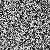

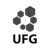

In [361]:
display_individual(array)
display_individual(pixel_array)

In [362]:
import numpy as np

def fitness_function(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    # Initialize the score to 0
    score = 0
    # Iterate over the elements of both arrays
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1

    return score

In [363]:
score = fitness_function(array, pixel_array)
print("Score:", score)

Score: 6


In [364]:
#TODO:
#Test altering the fitness function
#Rows and columns +20
# log(score) or exp(score)

In [365]:
def fitness_function2(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    score = 0

    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1
    # Check if entire rows match and increment the score by 20 points
    for i in range(array1.shape[0]):
        if np.array_equal(array1[i], array2[i]):
            score += 20
    # Check if entire columns match and increment the score by 20 points
    for j in range(array1.shape[1]):
        if np.array_equal(array1[:, j], array2[:, j]):
            score += 20
            
    return score

In [366]:
array_list = []
for i in range(2):
    binary_representation = generate_random_individual(width, length)
    array = individual_to_array(individual, width, length)
    array_list.append(array)

In [367]:
from PIL import Image

In [368]:
#import numpy as np
#from PIL import Image
#import imageio
#
## Create a list of arrays (n x n)
#array_list = []
#
## You can populate array_list with your own n x n arrays, e.g., random arrays
#n = 100
#for _ in range(100):
#    random_array = np.random.randint(0, 256, size=(n, n), dtype=np.uint8)
#    array_list.append(random_array)
#
## Function to convert an array to an image
#def array_to_image(array):
#    return Image.fromarray(array)
#
## Convert each array in the list to an image
#image_list = [array_to_image(array) for array in array_list]
#
## Save individual images and create a GIF
#output_path = "output.gif"
#imageio.mimsave(output_path, image_list, duration=0.2)  # Adjust the duration as needed (in seconds)
#
## Display or save the GIF
## imageio.mimwrite(output_path, image_list, duration=0.2)  # Uncomment this line if you want to save the GIF
#
#print("GIF created at:", output_path)


In [369]:
individual

'110010110011000100101010011101101001100011010011100001001010100010110100111000100111001010100111011010111000110011001100100110101100011101100111111001110101110100010101001001001001101100101001101110011010110001100100011100000010010111100010100101111010011110011101000011000111000100011010110110110010010011110100000001100101011100111001100110011011000101100010110011011000010100111011100110001110110011001010011101000011001000101001001101011010000000000100011011011011000010110100100110100001011010101111011011000111011110110000001010010111011000100011101111010100111100010100010001111111100011001100001001100011011110110111110010001010001110001010001110000110110001000011111101010100110000100001001100100010011000000101101111110110010110100010000110000001000001010110111111010000011011101000011010001110000001100111011111100110001111011110110101000011100111100110000001100100100110101111011111101001100100100110100110010000100110000111111111000000010010011000000111100011101100000110000010001110100

In [370]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [371]:
individual == individual

True

In [372]:
individual == perturbate_solution(individual, 1)

False

In [373]:
#Select the temperature change counter
k = 0.95
#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

In [374]:
def repetition_schedule(T):
    #TODO
    return 10

In [375]:
binary_representation = generate_random_individual(width, length)
binary_representation

'100011100100100001101011110101001001100011001000110010111110110011011100000010000010100101110100110111111101110111010001111100111110010000111100011010000010110000110000110010100101000010100011111110011010010100100011111010101110000000010000011010101000000010111010011011000000011101100111010010011101110011001111110010010010010100101000110110010011010110100100111111101101011000110101010000111000000110101011111001100000110111101111011011010111011101111111101110010110010001101100111111001010011111000110100001110100101101011111000110011100101011110000001011110011110011101101111000101011000101000010100111001001111111011100101011011100000011100100011001000100011100100011100000010111001101000111110101001010000010100001010111001110001001110011000010100110110000100100010000000000101000100011000111010110110100101011001111011100111101100000001011010101111100111001000010011010100010110111100110000111111110000111101111000100010011111111011000100101011110000001010010011101001011100011111010111010000

[[203  49  42 ...  59 152 236]
 [202 116  50 ...   6 232 104]
 [224 103 126 ... 108 146 189]
 ...
 [170 234 160 ...  63   2 133]
 [127  26 146 ...  79 106  78]
 [149  54 173 ... 211 183   5]]


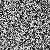

In [376]:
array = individual_to_array(individual, width, length)
print(array)
display_individual(array)

In [377]:
s0 = generate_random_individual(width, length)


individual_to_array(s0, width, length)

array([[133, 248, 166, ..., 213, 227,  97],
       [106, 181,  83, ...,  24,  91, 241],
       [255,   9,  30, ...,  77, 250, 147],
       ...,
       [  0, 192,  27, ..., 241, 181, 143],
       [223,  71,  50, ..., 190,   3,  47],
       [250, 227, 139, ..., 163, 183,  51]], dtype=uint8)

In [378]:
pixel_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [379]:
s0

'100001011111100010100110001011001111111001001010011110000010111011111100011101101010010101111110011100011100111000101101101000101010110010011101110110100011100100110000101000110011011101101011100110101111010101101010010100100010111001000111100100111000001110011010011110010101101000110011010001010000111001110111010011001011010100111111100100111110011110011001010001011101101011010101111000110110000101101010101101010101001111001101000011000101101011001110111011111000010111001101110100100001101111000011110010111101000001010100101101111100111001000101101111101111011010100111011000011100010010011110111110110010100110000010111111101110001010111110001100010011101111011001110000111010010010111111111011110010101111101010010010010000010101011101010101001100101101010101011001010001100001011011111100011111111100001001000111101101110001010001011011010100101011001011100100011010101110110001100011011011101001011110111101100111101101010101011001101010110000100111100011101101010100011010001110110000010

In [380]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.0001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [381]:
import numpy as np

def array_to_individual(array):
    assert isinstance(array, np.ndarray), "Input must be a numpy array"
    assert array.ndim == 2, "Input array must be 2-dimensional"
    
    width, length = array.shape
    binary_chunks = []

    # Convert integers to binary strings and pad with zeros to make each chunk 8 characters long
    for row in range(width):
        for col in range(length):
            binary_chunk = format(array[row, col], '08b')
            binary_chunks.append(binary_chunk)

    # Concatenate binary chunks to form the binary representation
    binary_representation = ''.join(binary_chunks)

    return binary_representation

In [382]:
#Select a initial Solution
s0 = generate_random_individual(width, length)
observation = 0

min_temperature = 0.0000001
max_temperature = 10
score_list = []
bin_list = []
#max_score_list, min_score_list = [], []
#Select the temperature change counter
k = 0.9998
max_score = fitness_function(pixel_array, pixel_array)
solution_individual = array_to_individual(pixel_array)

#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)
    
    #max_score_over_t, min_score_over_t = 0, 0 
    #score_over_t = []
    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        #s1_array = individual_to_array(s1, width, length)
        #s0_array = individual_to_array(s0, width, length)
        #
        #s1_score = - fitness_function(s1_array, pixel_array)
        #s0_score = - fitness_function(s0_array, pixel_array)
        
        s0_score = individual_score(s0, solution_individual)
        s1_score = individual_score(s1, solution_individual)
        delta = s1_score - s0_score

        p = np.exp(-delta/T)
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            
            if np.random.random() > p:
                s0 = s1
                
        observation += 1
        score_list.append(s0_score)
        
        #score_over_t.append(s0_score)
    #max_score_list.append(np.max(score_over_t))
    #min_score_list.append(np.min(min_score_over_t))
    T = cooling_schedule(T, k)
    
    #Helper Functions
    
    if observation % 1000 == 0:
        bin_list.append(s0)
        
    if observation % 10000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        #print(decode_binary_to_phrase(s0))
        print(s0)
        
    
    
    if s0_score <= 0.01:
        
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        #print(decode_binary_to_phrase(s0))
        print(s0)
        
        break

Observation: 10000 | Temperature 8.187143764431173 | score: 0.3084 | p: 1.0000061059331626
111010111010111010010001111111111011100001011101101111111100101001111010111111001001001111001100110111101011111011111111101011111101001111001101101110001100001110101101111110101111111101101001011111011011001110110100101111111011001111111011111101111101001000011001111101011101111111110110010011111110001001001010001010111111101101011001010111111100100111100100000101111111101101110111110110111011101100111110110111100001101111110101101111111011101000110110100111100111111001111111101111000101011111101110110100111111001001111110101010111000111111011011111111011110101101010111101101101011101111111111110101101110111110110111111100101111111001101001011111011011111000111111101011110110111110010111111110111101001100110001101001110011010010011111011000010111111011111111000111001101111011111001111110111111011111111101111001110111111111001100111010101011101011111101011110111010111111001000011111111111011001111

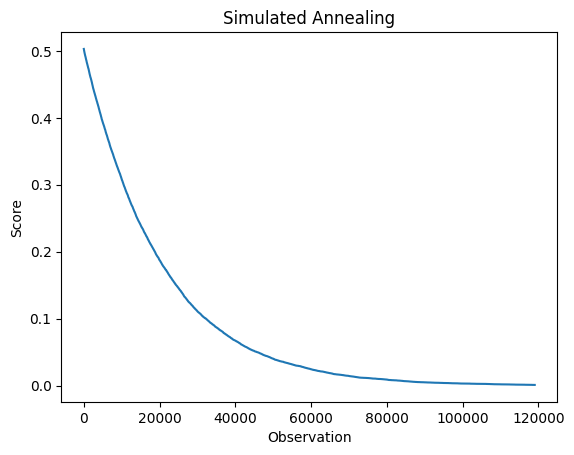

In [383]:
plt.plot(score_list);
plt.title("Simulated Annealing");
plt.xlabel("Observation");
plt.ylabel("Score");

In [384]:
final_array_list = [individual_to_array(bin_string, width, length) for bin_string in bin_list]
final_array_list

[array([[139, 174, 144, ..., 119, 201, 171],
        [ 62,  26,  25, ..., 140, 217, 113],
        [247, 253, 231, ..., 210, 219, 169],
        ...,
        [227, 112, 186, ...,  81, 105,  60],
        [210,  71, 200, ..., 141, 130, 133],
        [132, 202,  62, ..., 153, 246, 117]], dtype=uint8),
 array([[139, 174, 144, ..., 119, 201, 171],
        [ 62,  30,  25, ..., 140, 217, 113],
        [247, 253, 231, ..., 211, 219, 169],
        ...,
        [227, 112, 186, ...,  81, 105,  60],
        [210,  79, 200, ..., 141, 130, 133],
        [164, 202,  62, ..., 153, 254, 117]], dtype=uint8),
 array([[139, 174, 145, ..., 119, 201, 171],
        [ 62,  30,  27, ..., 140, 217, 115],
        [247, 253, 231, ..., 219, 219, 169],
        ...,
        [227, 112, 186, ...,  91, 105,  60],
        [210,  79, 200, ..., 141, 146, 133],
        [164, 202,  62, ..., 185, 254, 117]], dtype=uint8),
 array([[171, 174, 145, ..., 119, 203, 171],
        [ 62, 222,  27, ..., 140, 217, 115],
        [247, 25

In [385]:
len(final_array_list)

119

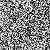

In [386]:
import os
import imageio.v2 as imageio
import numpy as np
from IPython.display import display, Image

def generate_GIF(image_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, image_array in enumerate(image_list):
        image_file = os.path.join(image_folder, f"image_{i}.png")
        # Convert the NumPy array to an image and save it
        imageio.imwrite(image_file, image_array)
        image_files.append(image_file)

    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=0.2)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))


generate_GIF(final_array_list)